<a href="https://colab.research.google.com/github/gonzalezzayra/SIMULACION-I/blob/main/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Monte Carlo de acierto y error**


Estimar

$$\int_{0}^{1} \sqrt{arc tan(x)} dx \approx 0.62982334$$

El método Monte Carlo es un método estadístico que se ha convertido en una herramienta fundamental en diversos campos

**Acierto y error**

Es un tipo de estimación del área de una región o de cálculo de la integral de unafunción.

Los puntos aleatorios no se generan dentro de un dominio específico, sino dentro de un dominio más amplio que incluye la región de interés.Luego se verifica cada punto para ver si "llega" a la región de interés, y esta información se utiliza para calcular la estimación.

In [219]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [220]:
#Definir funcion f(x) = raíz(arc tan(x))
def f(x):
  return np.sqrt(np.arctan(x))

In [221]:
#x genera 400 valores equidistantes entre 0 y 1
x = np.linspace(0,1,400)
#print(x)

In [222]:
#Evaluamos los valores del arreglo de los valores de x
#Como ya se había definido antes la funcion
y = f(x)
#Imprime cada valor evaluado en la función
#print(y)

In [21]:
#Siendo 1 el valor más grande en el arreglo de x
#Evaluamos la función en 1 y nos da el valor de 0.8862
f(1)

np.float64(0.8862269254527579)

In [122]:
#Generamos números aleatorios para 2 variables
#Podríamos ver el punto de coordenadas como (u1,u2)
u1 = rd.random()
u2 = rd.random()

In [118]:
#Definimos la función dardos
#Se simulan hasta n dardos
def dardos(n):
  exitos = 0 #contador para saber cuantos dardos caen
  for i in range(n):
    u1 = rd.random()
    u2 = rd.random()
    #necesitamos ver si es un exito
    if u2  <= f(u1): #si cae bajo la curva, se le suma un exito
      exitos += 1
  prob = exitos/n #obtenemos la probabilidad como los exitos entre el número de "lanzamientos"
  return prob

In [86]:
#Se simulan 1000000 y nos devuelve una estimación
dardos(1000000)

0.629518

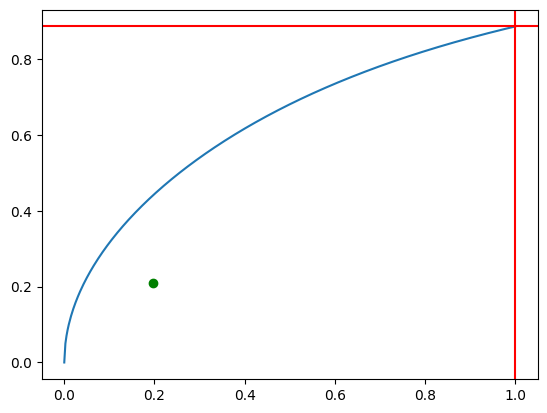

In [223]:
#La gráfica de f(x)
plt.plot(x,y)
plt.axhline(f(1), color ="red") #es la recta horizontal cuando se evalúa a f(x) en 1
plt.axvline(1, color = "red") #es la recta cuando x es igual a 1
plt.scatter(u1, u2, color = "green") #se gráfica el punto de coordenadas (u1,u2)

In [148]:
#Definimos el experimento
def experimento(m):
  lista = [] #generamos una lista para almacenar los valores
  for i in range(m): #ciclo for
    d = dardos(i+1) #se utiliza la función dardos qué antes se generó
    lista.append(d) #en la lista se guarda cada valor de d
  return(lista) #se devuelve la lista

In [225]:
l = experimento(1000) #se simula el experimento m veces
#print("Los valores del experimento:", l) imprime los valores del experimento
#valores que después se ocupan para graficar

In [228]:
#Calcular la media de los valores de l
media = np.mean(l)
print("El valor de la media es:", media)

El valor de la media es: 0.6297693821125923


In [229]:
#Calcular la varianza
varianza = np.var(l)

print("El valor de la varianza es:", varianza)
#Calcular la desviación estándar
desviacion = np.sqrt(varianza)
print("El valor de la desviación estándar es:", desviacion)

El valor de la varianza es: 0.002021646091722951
El valor de la desviación estándar es: 0.04496271890936925


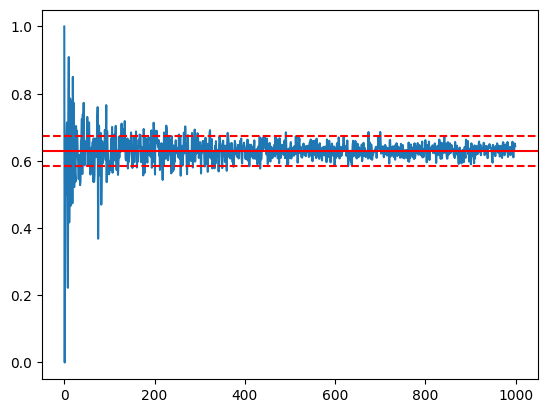

In [230]:
#Grafica del experimento con
plt.plot(l)
plt.axhline(media, color = "red")
#plt.axhline(0.629823, color = "green") solo con valor de referencia
plt.axhline(media + desviacion, color ="red", linestyle = "--") #linea de referencia con la media
plt.axhline(media - desviacion, color ="red", linestyle = "--") #línea de referencia de la desviacion con respecto a la media
#se va acercando a 0.6298

In [231]:
print(l[-1])
#imprime el último valor del experimento

0.644


In [233]:
#Calcular el error

aprox = 0.629823344
error = abs(aprox - l[-1]) #del último valor del experimento
print("El error es:", error)

El error es: 0.014176656000000065
